# Main Code 

## 2D (optional: query points)

In [1]:
from Test_Funcs import egg,hartmann,branin
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle
from plotting_utilities import *
import numpy as np

In [7]:
savefile = True

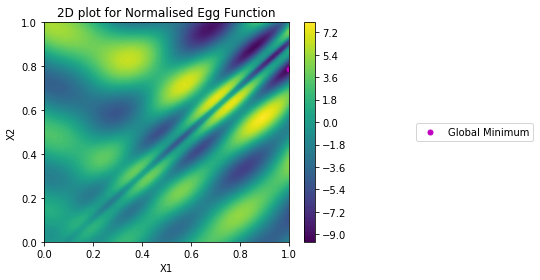

In [3]:
funcs = {
    "branin": branin,
    "egg": egg,
    "hartmann": hartmann
}

# Minimum y value
min_y_dict = {
    "hartmann": np.array([-18.22368011]),
    "egg": np.array([-9.596407]),
    "branin": np.array([-14.96021125])
}

# Minimiser x value
min_x_dict = {
    "hartmann": np.array([[0.20169, 0.150011, 0.476874, 0.275332, 0.311652, 0.6573]]),
    "egg": np.array([[1.0, 0.7895]]),
    "branin": np.array([[0.1239, 0.8183],[0.5428, 0.1517],[0.9617, 0.1650]])
}

# Dimensions
dim_dict = {
    "hartmann": 6,
    "egg": 2,
    "branin": 2    
}

graph_title3 = {
    "egg": "3D plot for Normalised Egg Function",
    "branin": "3D plot for Normalised Branin Function"
}

graph_title = {
    "egg": "2D plot for Normalised Egg Function",
    "branin": "2D plot for Normalised Branin Function"
}

def plot_contour_2d(selected_func, past_x = np.array([]), no_queries = 20, 
                   past_x_opt = np.array([]), seed = 0, type = "fitbo"):
    """ 
    Plots and saves 2d plots
    Past_x and no_queries: plots query record
    """
    x_min = min_x_dict[selected_func]
    func = funcs[selected_func]
    
    x1 = np.linspace(0.0, 1.0, 100)
    x2 = np.linspace(0.0, 1.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
    Y = func(X)
    
    plt.figure(figsize=(8,4))    
    plt.contourf(X1, X2, Y.reshape((100,100)),100)
    if (len(x_min)>1):    
        plt.plot(np.array(x_min)[:,0], np.array(x_min)[:,1], 'm.', markersize=10, label='Global Minima')
    else:
        plt.plot(x_min[0][0], x_min[0][1], 'm.', markersize=10, label='Global Minimum')
    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(graph_title[selected_func])
    
    # History of query - labelled with TRIANGLE
    if past_x.shape != (0,): # Means we have query record
        lons = past_x[:no_queries,0]
        lats = past_x[:no_queries,1]
        vals = np.arange(lons.shape[0])
        plt.scatter(lons, lats, marker = '^', c=vals, cmap='afmhot', label='Queries')  
        plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
        plt.colorbar()
        savepath = "Exp_Data/Graphs/2d_queries_" + selected_func + ",seed_" + str(seed) + ".png"
    else:
        savepath = "Exp_Data/Graphs/2d_contour_" + selected_func + ".png"
    
    # History of x_opt guess - labelled with cross
    if past_x_opt.shape != (0,): # Means we have query record
        lons = past_x_opt[:no_queries,0]
        lats = past_x_opt[:no_queries,1]
        vals = np.arange(lons.shape[0])
        plt.scatter(lons, lats, marker = '+', c=vals, cmap='afmhot', label = 'Predicted Minimiser')  
        plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
        savepath = "Exp_Data/Graphs/2d_x-opt_" + "," + type + ","+ selected_func + ",seed_" + str(seed) + ".png"
    
    plt.tight_layout()
    if savefile:
        print("Saving file at: " + savepath)
        plt.savefig(savepath)
    plt.show()
    
plot_contour_2d("egg")

# Showing historical 

### FITBO

In [55]:
def load_pickle_x(seed_size, seed, func, batch, heuristic, batch_size):
    """ 
    Loads past queries, excluding initial points
    Returns array of x1 and x2
    """
    loaded_x = load_pickle(seed_size, seed, func, batch, heuristic, batch_size, "X")
    if func == "hartmann":
        init_x = 6
    else:
        init_x = 3
    
    x = loaded_x[init_x:,:]

    return x

def load_pickle_x_opt(seed_size, seed, func, batch, heuristic, batch_size):
    """
    Loads past guesses of optimal x location
    
    Note: only works for sequential - seed 5
    """
    metrics = "X-opt"
    dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed,sequential/" 
    filename = "A_results_" + metrics + ",sequential.npy"
    
    results = np.load(dir_name + filename)
    return results[seed]
    

In [63]:
past_x = load_pickle_x(seed_size = 50, seed = 0, func = "branin", batch = False, heuristic = "cl-min", batch_size = 2)

In [61]:
past_x_opt = load_pickle_x_opt(seed_size = 5, seed = 0, func = "branin", batch= False, heuristic = "cl-min", batch_size = 2)

Saving file at: Exp_Data/Graphs/2d_x-opt_,fitbo,branin,seed_0.png


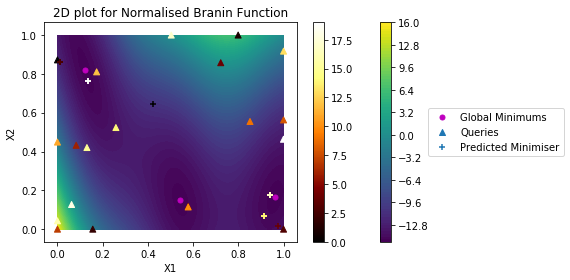

Saving file at: Exp_Data/Graphs/2d_x-opt_,fitbo,branin,seed_1.png


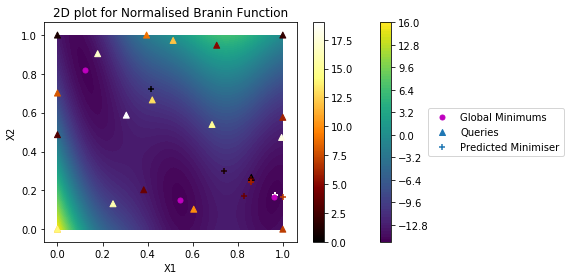

Saving file at: Exp_Data/Graphs/2d_x-opt_,fitbo,branin,seed_2.png


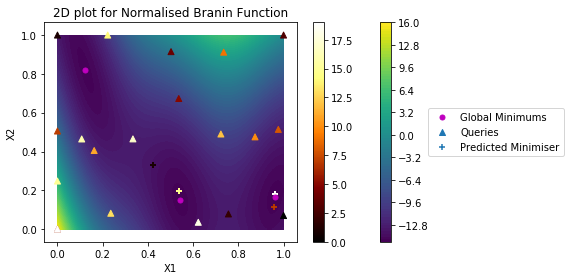

Saving file at: Exp_Data/Graphs/2d_x-opt_,fitbo,branin,seed_3.png


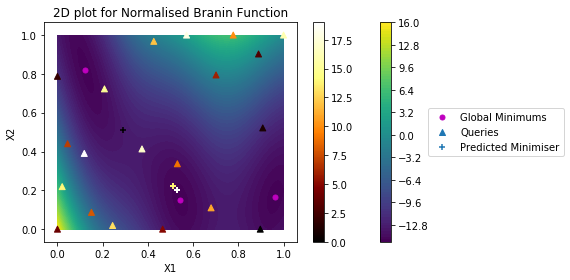

Saving file at: Exp_Data/Graphs/2d_x-opt_,fitbo,branin,seed_4.png


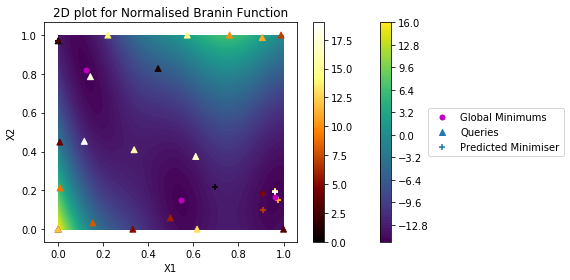

In [83]:
selected_func = "branin"

shown_number = 20

for i in range(5):
    past_x = load_pickle_x(seed_size = 50, seed = i, func = selected_func, batch = False, heuristic = "cl-min", batch_size = 2)
    past_x_opt = load_pickle_x_opt(seed_size = 5, seed = i, func = selected_func, batch= False, heuristic = "cl-min", batch_size = 2)
    plot_contour_2d(selected_func, past_x, shown_number, past_x_opt = past_x_opt, seed = i)

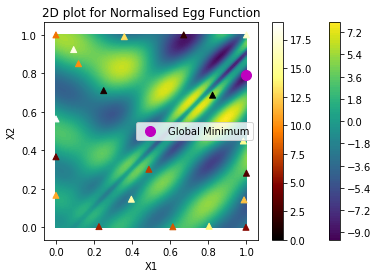

In [6]:
selected_func = "egg"
x_min = min_x_dict[selected_func]
func = funcs[selected_func]

x1 = np.linspace(0.0, 1.0, 100)
x2 = np.linspace(0.0, 1.0, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
Y = func(X)

plt.figure()    
plt.contourf(X1, X2, Y.reshape((100,100)),100)
if (len(x_min)>1):    
    plt.plot(np.array(x_min)[:,0], np.array(x_min)[:,1], 'm.', markersize=20, label='Global Minimums')
else:
    plt.plot(x_min[0][0], x_min[0][1], 'm.', markersize=20, label='Global Minimum')
plt.legend()
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(graph_title[selected_func])

no_queries = 20
lons = past_x[:no_queries,0]
lats = past_x[:no_queries,1]
vals = np.arange(lons.shape[0])
plt.scatter(lons, lats, marker = '^', c=vals, cmap='afmhot', )  
plt.colorbar()


### Load GPyOpt

In [4]:
def load_pickle_gpyopt_v2(func, seed_size, batch_size, acq_func, eval_type):
    dir_name = "Exp_Data/gpyopt/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch/'
    file_name = dir_name + acq_func + ',' + eval_type + ',results_vars.pickle'
    
    with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
        pickle_dict = pickle.load(f)
        x_opt = pickle_dict["X"]
        min_y = pickle_dict["min_y"]
        x_hist = pickle_dict["eval_record"]
        
    return x_opt, min_y, x_hist

In [9]:
X, min_y, eval_record = load_pickle_gpyopt_v2("branin", 5, 1, "EI", "local_penalization")

Saving file at: Exp_Data/Graphs/2d_x-opt_,LCB,branin,seed_0.png


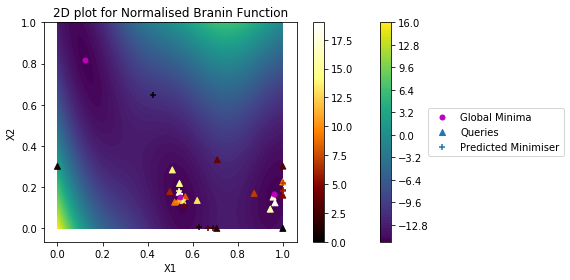

Saving file at: Exp_Data/Graphs/2d_x-opt_,LCB,branin,seed_1.png


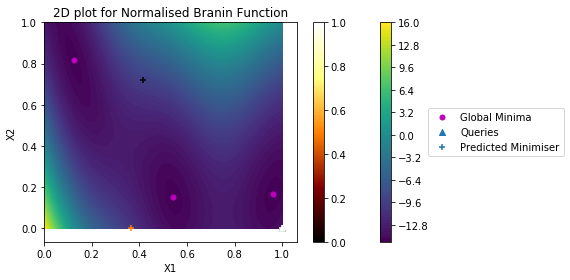

Saving file at: Exp_Data/Graphs/2d_x-opt_,LCB,branin,seed_2.png


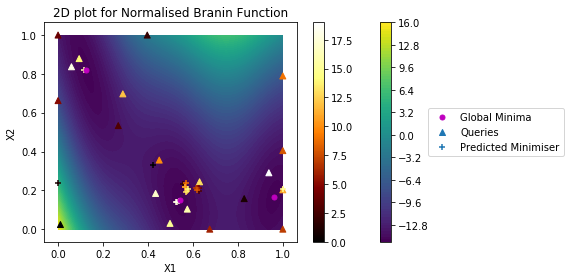

Saving file at: Exp_Data/Graphs/2d_x-opt_,LCB,branin,seed_3.png


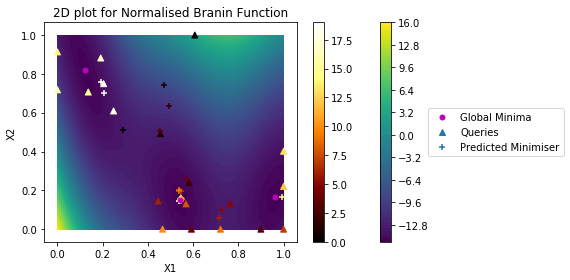

Saving file at: Exp_Data/Graphs/2d_x-opt_,LCB,branin,seed_4.png


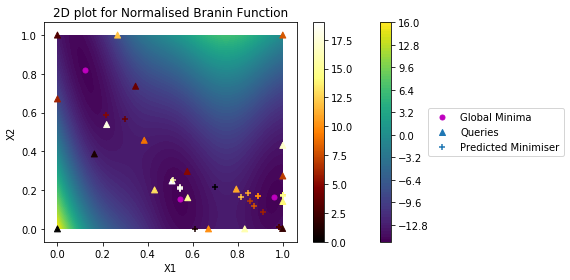

In [13]:
selected_func = "branin"
acq_func = "LCB"
shown_number = 20

for i in range(5):
    past_x_opt, min_y ,past_x = load_pickle_gpyopt_v2(selected_func, 50, 1, acq_func , "local_penalization")
    past_x_opt = past_x_opt[i]
    past_x = past_x[i]
    plot_contour_2d(selected_func, past_x, shown_number, past_x_opt = past_x_opt, seed = i, type = acq_func)

array([[6.97728825e-01, 2.16089496e-01],
       [6.10364900e-01, 2.64613093e-04],
       [9.83400681e-01, 8.98610082e-03],
       [9.83400671e-01, 8.98608969e-03],
       [3.07462536e-01, 6.14356348e-01],
       [2.13751592e-01, 6.10781295e-01],
       [8.66433303e-01, 1.07541935e-01],
       [8.79709052e-01, 9.16971819e-02],
       [8.80868013e-01, 8.09391459e-02],
       [8.73067737e-01, 9.57930476e-02],
       [8.80238577e-01, 1.07138561e-01],
       [8.72749953e-01, 8.99873856e-02],
       [9.44653835e-01, 9.38647680e-02],
       [9.44837681e-01, 9.41935112e-02],
       [9.36982067e-01, 7.35457428e-02],
       [9.38375309e-01, 6.71080015e-02],
       [9.90975567e-01, 2.17361040e-01],
       [9.38829396e-01, 6.91598782e-02],
       [9.38804596e-01, 6.92849793e-02],
       [9.38913439e-01, 6.82340507e-02],
       [9.61770970e-01, 1.60740047e-01],
       [9.61877612e-01, 1.61312511e-01],
       [5.45645149e-01, 1.17730554e-01],
       [9.61753006e-01, 1.61144324e-01],
       [9.678569